## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


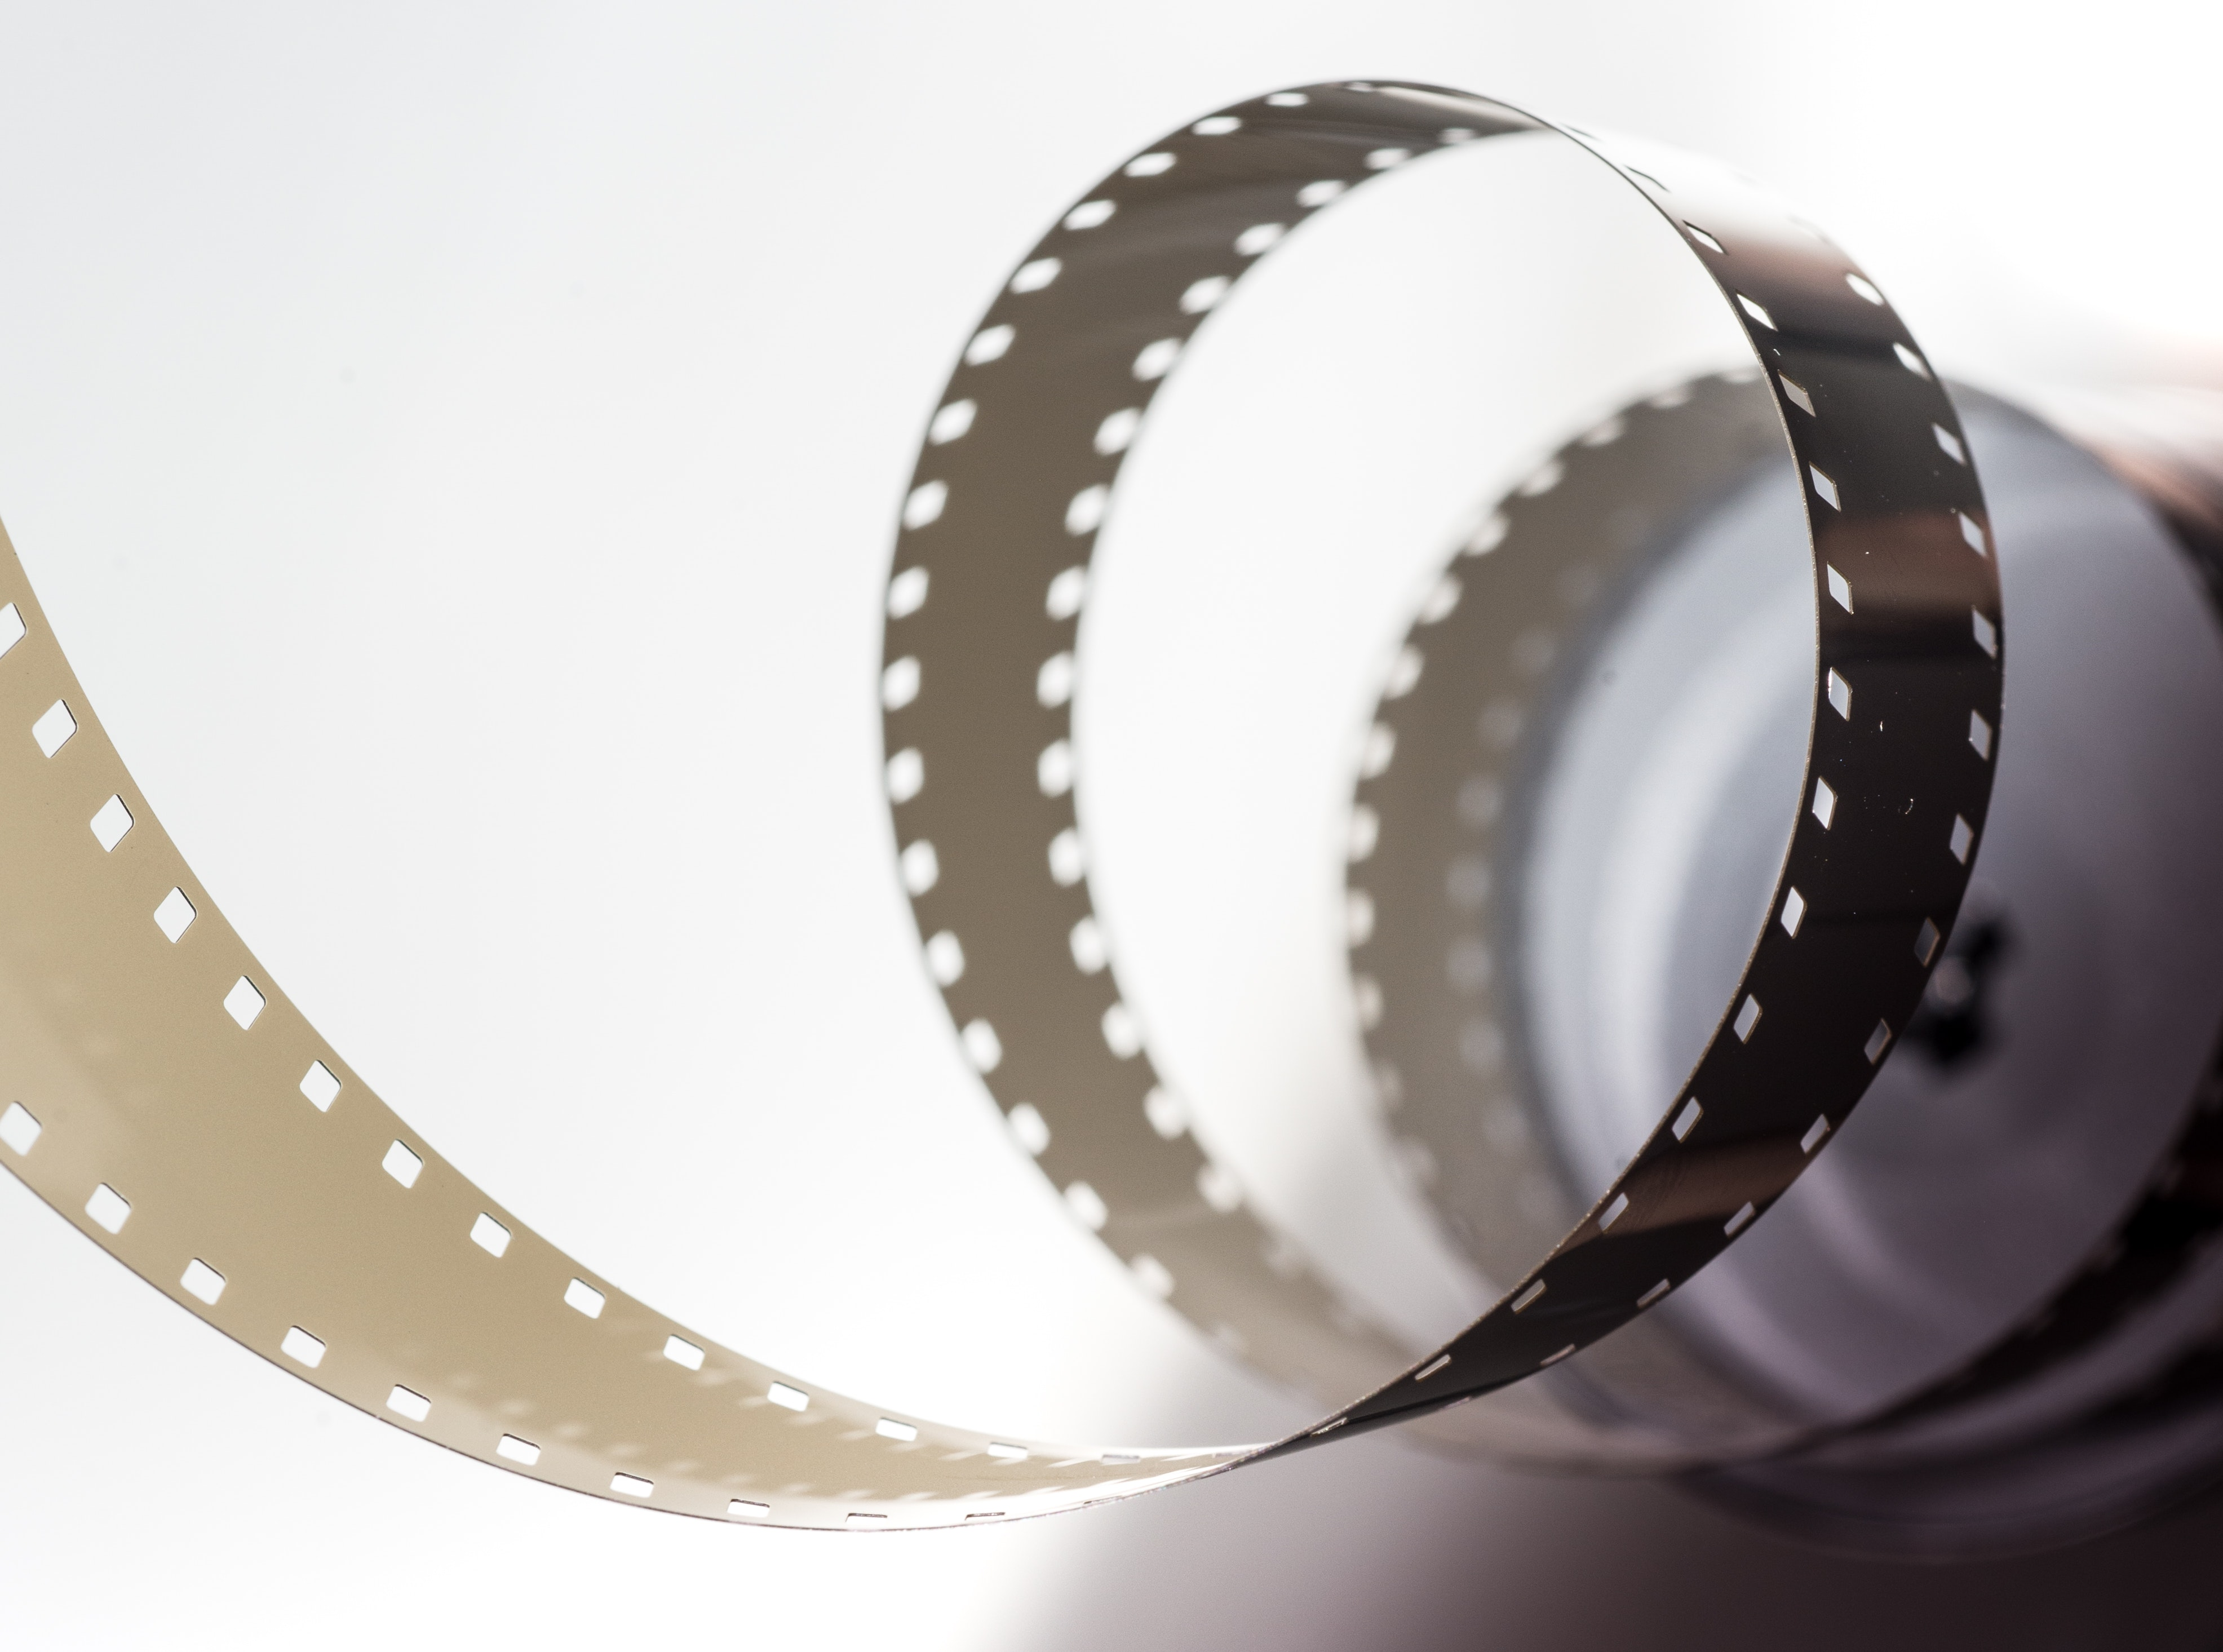

# Film Industry Analysis

## Overview

## Business Problem

## Data Understanding

I used...

In [1]:
# importing necessary packages
import pandas as pd
# setting pandas display to avoid scientific notation in the dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Box office mojo

In [2]:
bom_movie_df = pd.read_csv('unzipped/bom.movie_gross.csv')
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


In [3]:
# getting info for DataFrame
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
# generating descriptive statistics for domestic box office values
bom_movie_df['domestic_gross'].describe()

count        3359.00
mean     28745845.07
std      66982498.24
min           100.00
25%        120000.00
50%       1400000.00
75%      27900000.00
max     936700000.00
Name: domestic_gross, dtype: float64

In [5]:
#generating descriptive statistics for production budget values
bom_movie_df['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

In [6]:
# convert "foreign_gross' column to a float 
bom_movie_df['foreign_gross'] = pd.to_numeric(bom_movie_df['foreign_gross'], errors='coerce')

In [7]:
#regenerating descriptive statistics for production budget values
bom_movie_df['foreign_gross'].describe()

count        2032.00
mean     75057041.63
std     137529351.20
min           600.00
25%       3775000.00
50%      18900000.00
75%      75050000.00
max     960500000.00
Name: foreign_gross, dtype: float64

In [8]:
#checking for missing values in the bom_movie_df
bom_movie_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [9]:
#checking the percentage of missing values in foreign_gross column 
missing_percent = (bom_movie_df["foreign_gross"].isnull().sum() / len(bom_movie_df["foreign_gross"])) * 100
print("Percentage of missing values in 'foreign_gross' column of bom_movie_df: {:.2f}%".format(missing_percent))

Percentage of missing values in 'foreign_gross' column of bom_movie_df: 40.01%


Clearly, there is  large number of missing values in the 'foreign_gross' column.

In [10]:
bom_movie_df["studio"].fillna("None", inplace = True) 
bom_movie_df["domestic_gross"].fillna(0, inplace = True)
bom_movie_df["foreign_gross"].fillna(0, inplace = True)

In [11]:
#checking for missing values in the bom_movie_df
bom_movie_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [12]:
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010
3,Inception,WB,292600000.00,535700000.00,2010
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,0.00,2018
3383,Edward II (2018 re-release),FM,4800.00,0.00,2018
3384,El Pacto,Sony,2500.00,0.00,2018
3385,The Swan,Synergetic,2400.00,0.00,2018


In [13]:
duplicates = bom_movie_df.duplicated()
print(duplicates.sum())

0


In [14]:
duplicates = bom_movie_df.duplicated(keep=False)
print(bom_movie_df[duplicates])

Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []


### tmdb

In [205]:
tmdb_movies = pd.read_csv('unzipped/tmdb.movies.csv', index_col=0)
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [44]:
#Look at data info
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [45]:
#sorting by the "popularity" column in ascending order
tmdb_movies.sort_values(by=["popularity"], ascending=True).head(5)

# some titles are precisely unpopular with popularity as low as 0.6 and vote_counts as low as 1

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,[99],403294,en,9/11: Simulations,0.60,2014-07-04,9/11: Simulations,10.00,1
11010,[],203325,en,Slaves Body,0.60,2013-06-25,Slaves Body,0.50,1
11011,[99],186242,en,Re-Emerging: The Jews of Nigeria,0.60,2013-05-17,Re-Emerging: The Jews of Nigeria,0.50,2
11012,[99],116868,en,Occupation: Fighter,0.60,2013-08-02,Occupation: Fighter,0.50,2
11013,[99],85337,en,Wonders Are Many: The Making of Doctor Atomic,0.60,2013-08-07,Wonders Are Many: The Making of Doctor Atomic,0.50,2


In [46]:
tmdb_movies.vote_count.mean()

#the mean is quite low

194.22483689708488

In [47]:
tmdb_movies.sort_values(by=["vote_count"], ascending=False).head(5)

# the highest vote_count is 22186

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
17383,"[28, 12, 35]",293660,en,Deadpool,35.07,2016-02-12,Deadpool,7.60,20175
5179,"[878, 28, 12]",24428,en,The Avengers,50.29,2012-05-04,The Avengers,7.60,19673
6,"[28, 12, 14, 878]",19995,en,Avatar,26.53,2009-12-18,Avatar,7.40,18676
11032,"[12, 18, 878]",157336,en,Interstellar,28.44,2014-11-05,Interstellar,8.20,18597


In [48]:
# creating a list of all the vote_counts and sorting them
vote_counts = tmdb_movies['vote_count'].tolist()
vote_counts_sorted = sorted(vote_counts)

In [49]:
# Define a function to filter a list to values between two numbers
def filter_list(lst, min_val, max_val):
    filtered_list = [x for x in lst if (x > min_val) and (x < max_val)]
    return filtered_list

In [50]:
# Count the number of movies that have vote counts between 1000 and 23000
num_movies = len(filter_list(vote_counts_sorted, 999, 23000))
num_movies

1108

In [51]:
# Filter the DataFrame to only include movies with vote counts of 1000 or more
filtered_tmdb = tmdb_movies[tmdb_movies['vote_count'] >= 1000]
filtered_tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [52]:
# Find duplicates based on all columns
duplicates = filtered_tmdb.duplicated()

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = filtered_tmdb[duplicates]

# Print the duplicate rows
print(len(duplicate_rows))


125


In [53]:
# deleting duplicates
tmdb_movies = filtered_tmdb.drop_duplicates(subset='original_title').reset_index(drop=True)

In [54]:
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [80]:
# Filter the DataFrame to contain movies released in or after 2013
tmdb_df_filtered = tmdb_movies[tmdb_movies['release_date'] >= '2013-01-01']

In [81]:
tmdb_df_filtered

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
305,"[28, 12, 878]",68721,en,Iron Man 3,32.09,2013-05-03,Iron Man 3,6.90,14155
306,"[28, 12, 14]",76338,en,Thor: The Dark World,31.01,2013-11-08,Thor: The Dark World,6.70,10171
307,"[80, 18, 35]",106646,en,The Wolf of Wall Street,29.52,2013-12-25,The Wolf of Wall Street,7.90,12411
308,"[878, 53, 18]",49047,en,Gravity,27.84,2013-10-04,Gravity,7.20,9586
309,"[28, 12, 14, 878]",49521,en,Man of Steel,27.67,2013-06-14,Man of Steel,6.50,9758
...,...,...,...,...,...,...,...,...,...
974,"[12, 878, 10751, 14]",407451,en,A Wrinkle in Time,12.53,2018-03-09,A Wrinkle in Time,5.00,1073
975,"[35, 10749, 14]",433310,en,When We First Met,12.37,2018-02-09,When We First Met,6.60,1433
976,"[878, 9648, 18, 53, 10770]",569547,en,Black Mirror: Bandersnatch,12.28,2018-12-28,Black Mirror: Bandersnatch,7.00,1932
977,[27],433808,en,The Ritual,11.54,2018-02-09,The Ritual,6.00,1088


In [82]:
# genre_ids are list of numbers, actually in a string. 
tmdb_df_filtered.iloc[0]['genre_ids']

'[28, 12, 878]'

In [83]:
tmdb_df_filtered

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
305,"[28, 12, 878]",68721,en,Iron Man 3,32.09,2013-05-03,Iron Man 3,6.90,14155
306,"[28, 12, 14]",76338,en,Thor: The Dark World,31.01,2013-11-08,Thor: The Dark World,6.70,10171
307,"[80, 18, 35]",106646,en,The Wolf of Wall Street,29.52,2013-12-25,The Wolf of Wall Street,7.90,12411
308,"[878, 53, 18]",49047,en,Gravity,27.84,2013-10-04,Gravity,7.20,9586
309,"[28, 12, 14, 878]",49521,en,Man of Steel,27.67,2013-06-14,Man of Steel,6.50,9758
...,...,...,...,...,...,...,...,...,...
974,"[12, 878, 10751, 14]",407451,en,A Wrinkle in Time,12.53,2018-03-09,A Wrinkle in Time,5.00,1073
975,"[35, 10749, 14]",433310,en,When We First Met,12.37,2018-02-09,When We First Met,6.60,1433
976,"[878, 9648, 18, 53, 10770]",569547,en,Black Mirror: Bandersnatch,12.28,2018-12-28,Black Mirror: Bandersnatch,7.00,1932
977,[27],433808,en,The Ritual,11.54,2018-02-09,The Ritual,6.00,1088


In [170]:
#Create dictionary of genre ID and its associated genre name.This information is sourced from tmdb.

genre_dict = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}


In [191]:
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['genre'])
genre_df.index.name = 'id'
genre_df.reset_index(inplace=True)
genre_df

,id,genre
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [88]:
#defining a function for removing the brackets from the string in 'genre_ids' and converting each item into an integer
def split_ids(string):
    string = string.replace('[','').replace(']','')  # remove square brackets
    numbers = list(string.split(','))
    new_list = []
    for i in numbers:
        new_list.append(int(i))
    return new_list

In [89]:
#applying the "split_ids" function to each value in the "genre_ids" 
tmdb_df_filtered['genre_ids'] = tmdb_df_filtered['genre_ids'].apply(lambda x: split_ids(x))

In [90]:
# Define a function to map genre IDs to genre names
def get_genre_names(ids):
    names = []
    for id in ids:
        names.append(genre_dict[id])
    return names

# Apply the function to the "genre_ids" column and create a new "genre_names" column
tmdb_df_filtered['genre_names'] = tmdb_df_filtered['genre_ids'].apply(lambda x: get_genre_names(x))

In [91]:
tmdb_df_filtered

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
305,"[28, 12, 878]",68721,en,Iron Man 3,32.09,2013-05-03,Iron Man 3,6.90,14155,"[Action, Adventure, Science Fiction]"
306,"[28, 12, 14]",76338,en,Thor: The Dark World,31.01,2013-11-08,Thor: The Dark World,6.70,10171,"[Action, Adventure, Fantasy]"
307,"[80, 18, 35]",106646,en,The Wolf of Wall Street,29.52,2013-12-25,The Wolf of Wall Street,7.90,12411,"[Crime, Drama, Comedy]"
308,"[878, 53, 18]",49047,en,Gravity,27.84,2013-10-04,Gravity,7.20,9586,"[Science Fiction, Thriller, Drama]"
309,"[28, 12, 14, 878]",49521,en,Man of Steel,27.67,2013-06-14,Man of Steel,6.50,9758,"[Action, Adventure, Fantasy, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...
974,"[12, 878, 10751, 14]",407451,en,A Wrinkle in Time,12.53,2018-03-09,A Wrinkle in Time,5.00,1073,"[Adventure, Science Fiction, Family, Fantasy]"
975,"[35, 10749, 14]",433310,en,When We First Met,12.37,2018-02-09,When We First Met,6.60,1433,"[Comedy, Romance, Fantasy]"
976,"[878, 9648, 18, 53, 10770]",569547,en,Black Mirror: Bandersnatch,12.28,2018-12-28,Black Mirror: Bandersnatch,7.00,1932,"[Science Fiction, Mystery, Drama, Thriller, TV..."
977,[27],433808,en,The Ritual,11.54,2018-02-09,The Ritual,6.00,1088,[Horror]


In [92]:
#checking for missing values
missing_values_count = tmdb_df_filtered.isnull().sum()
print(missing_values_count)

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
genre_names          0
dtype: int64


### The numbers movie budgets

In [226]:
#Loading the movie budget dataset
movie_budgets_df = pd.read_csv('unzipped/tn.movie_budgets.csv')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [227]:
# generating a brief description for DataFrame
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [228]:
#replace commas and dollar signs in the 'worldwide_gross', 'domestic_gross', and 'production_budget' columns with nothing ('') and then convert them to floats 
movie_budgets_df[['worldwide_gross', 'domestic_gross', 'production_budget']] = movie_budgets_df[['worldwide_gross', 'domestic_gross', 'production_budget']].apply(lambda x: x.str.replace(',', '').str.replace('$', '').astype(float))


In [225]:
#inspecting the dataframe
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00


In [231]:
#merge the bom_movie_df and movie_budget df on movie titles
merged_df = pd.merge(bom_movie_df, movie_budgets_df, how='inner', left_on='title', right_on='movie')
#drop title and domestic_gross since they appear in both dataframes
merged_df = merged_df.drop(['domestic_gross_y', 'title'], axis=1)
#preview the merged dataframe
merged_df


,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross
0,BV,415000000.00,652000000.00,2010,47,"Jun 18, 2010",Toy Story 3,200000000.00,1068879522.00
1,WB,292600000.00,535700000.00,2010,38,"Jul 16, 2010",Inception,160000000.00,835524642.00
2,P/DW,238700000.00,513900000.00,2010,27,"May 21, 2010",Shrek Forever After,165000000.00,756244673.00
3,Sum.,300500000.00,398000000.00,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.00,706102828.00
4,Par.,312400000.00,311500000.00,2010,15,"May 7, 2010",Iron Man 2,170000000.00,621156389.00
...,...,...,...,...,...,...,...,...,...
1242,VE,4300000.00,0.00,2018,64,"Jun 15, 2018",Gotti,10000000.00,6089100.00
1243,RAtt.,3700000.00,0.00,2018,95,"Dec 7, 2018",Ben is Back,13000000.00,9633111.00
1244,VE,491000.00,1700000.00,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000.00,648599.00
1245,RLJ,1200000.00,0.00,2018,71,"Sep 14, 2018",Mandy,6000000.00,1427656.00


In [232]:
# Filter the DataFrame to include only years above 2013
movie_budgets_filtered_df = merged_df[merged_df['year'] >= 2013]
movie_budgets_filtered_df

,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross
496,BV,400700000.00,875700000.00,2013,56,"Nov 22, 2013",Frozen,150000000.00,1272469910.00
497,BV,409000000.00,805800000.00,2013,48,"May 3, 2013",Iron Man 3,200000000.00,1215392272.00
498,Uni.,368100000.00,602700000.00,2013,22,"Jul 3, 2013",Despicable Me 2,76000000.00,975216835.00
499,WB (NL),258399999.00,700000000.00,2013,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000.00,960366855.00
500,LGF,424700000.00,440300000.00,2013,38,"Nov 22, 2013",The Hunger Games: Catching Fire,130000000.00,864868047.00
...,...,...,...,...,...,...,...,...,...
1242,VE,4300000.00,0.00,2018,64,"Jun 15, 2018",Gotti,10000000.00,6089100.00
1243,RAtt.,3700000.00,0.00,2018,95,"Dec 7, 2018",Ben is Back,13000000.00,9633111.00
1244,VE,491000.00,1700000.00,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000.00,648599.00
1245,RLJ,1200000.00,0.00,2018,71,"Sep 14, 2018",Mandy,6000000.00,1427656.00


In [222]:
#checking for missing values
missing_values_count = movie_budgets_filtered_df.isnull().sum()
print(missing_values_count)

studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id                   0
release_date         0
movie                0
production_budget    0
worldwide_gross      0
dtype: int64


In [233]:
#calculating and creating a new column in the dataframe named 'ROI'
movie_budgets_filtered_df['ROI'] = ((movie_budgets_filtered_df['worldwide_gross'] - movie_budgets_filtered_df['production_budget']) / movie_budgets_filtered_df['production_budget']) * 100
movie_budgets_filtered_df.head()

,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross,ROI
496,BV,400700000.00,875700000.00,2013,56,"Nov 22, 2013",Frozen,150000000.00,1272469910.00,748.31
497,BV,409000000.00,805800000.00,2013,48,"May 3, 2013",Iron Man 3,200000000.00,1215392272.00,507.70
498,Uni.,368100000.00,602700000.00,2013,22,"Jul 3, 2013",Despicable Me 2,76000000.00,975216835.00,1183.18
499,WB (NL),258399999.00,700000000.00,2013,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000.00,960366855.00,284.15
500,LGF,424700000.00,440300000.00,2013,38,"Nov 22, 2013",The Hunger Games: Catching Fire,130000000.00,864868047.00,565.28


In [314]:
#merge the movie_budgets_filtered_df and tmdb_df_filtered on movie titles
final_merged_df = pd.merge(tmdb_df_filtered, movie_budgets_filtered_df , how='inner', left_on='title', right_on='movie')
final_merged_df

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,genre_names,studio,domestic_gross_x,foreign_gross,year,id_y,release_date_y,movie,production_budget,worldwide_gross,ROI
0,"[28, 12, 878]",68721,en,Iron Man 3,32.09,2013-05-03,Iron Man 3,6.90,14155,"[Action, Adventure, Science Fiction]",BV,409000000.00,805800000.00,2013,48,"May 3, 2013",Iron Man 3,200000000.00,1215392272.00,507.70
1,"[28, 12, 14]",76338,en,Thor: The Dark World,31.01,2013-11-08,Thor: The Dark World,6.70,10171,"[Action, Adventure, Fantasy]",BV,206400000.00,438200000.00,2013,66,"Nov 8, 2013",Thor: The Dark World,150000000.00,644602516.00,329.74
2,"[80, 18, 35]",106646,en,The Wolf of Wall Street,29.52,2013-12-25,The Wolf of Wall Street,7.90,12411,"[Crime, Drama, Comedy]",Par.,116900000.00,275100000.00,2013,76,"Dec 25, 2013",The Wolf of Wall Street,100000000.00,389870414.00,289.87
3,"[878, 53, 18]",49047,en,Gravity,27.84,2013-10-04,Gravity,7.20,9586,"[Science Fiction, Thriller, Drama]",WB,274100000.00,449100000.00,2013,16,"Oct 4, 2013",Gravity,110000000.00,693698673.00,530.64
4,"[28, 12, 14, 878]",49521,en,Man of Steel,27.67,2013-06-14,Man of Steel,6.50,9758,"[Action, Adventure, Fantasy, Science Fiction]",WB,291000000.00,377000000.00,2013,29,"Jun 14, 2013",Man of Steel,225000000.00,667999518.00,196.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,"[9648, 27, 53]",406563,en,Insidious: The Last Key,16.02,2018-01-05,Insidious: The Last Key,6.10,1306,"[Mystery, Horror, Thriller]",Uni.,67700000.00,100100000.00,2018,45,"Jan 5, 2018",Insidious: The Last Key,10000000.00,167885588.00,1578.86
442,"[35, 18, 10749]",449176,en,"Love, Simon",15.61,2018-03-16,"Love, Simon",8.20,3165,"[Comedy, Drama, Romance]",Fox,40800000.00,25500000.00,2018,57,"Mar 16, 2018","Love, Simon",10000000.00,65520633.00,555.21
443,"[53, 27]",460019,en,Truth or Dare,14.35,2018-04-13,Truth or Dare,6.00,2005,"[Thriller, Horror]",Uni.,41400000.00,53900000.00,2018,91,"Apr 13, 2018",Truth or Dare,3500000.00,95127344.00,2617.92
444,"[10752, 18, 36, 28]",429351,en,12 Strong,13.18,2018-01-19,12 Strong,5.60,1312,"[War, Drama, History, Action]",WB,45800000.00,21600000.00,2018,64,"Jan 19, 2018",12 Strong,35000000.00,71118378.00,103.20


In [315]:
#drop irrelevant columns since they appear in both dataframes
tmbd_mb_df = final_merged_df.drop(['foreign_gross', 'title', 'original_language', 'release_date_y', 'movie', 'id_y', 'id_x', 'vote_count', 'studio'], axis=1)
tmbd_mb_df

,genre_ids,original_title,popularity,release_date_x,vote_average,genre_names,domestic_gross_x,year,production_budget,worldwide_gross,ROI
0,"[28, 12, 878]",Iron Man 3,32.09,2013-05-03,6.90,"[Action, Adventure, Science Fiction]",409000000.00,2013,200000000.00,1215392272.00,507.70
1,"[28, 12, 14]",Thor: The Dark World,31.01,2013-11-08,6.70,"[Action, Adventure, Fantasy]",206400000.00,2013,150000000.00,644602516.00,329.74
2,"[80, 18, 35]",The Wolf of Wall Street,29.52,2013-12-25,7.90,"[Crime, Drama, Comedy]",116900000.00,2013,100000000.00,389870414.00,289.87
3,"[878, 53, 18]",Gravity,27.84,2013-10-04,7.20,"[Science Fiction, Thriller, Drama]",274100000.00,2013,110000000.00,693698673.00,530.64
4,"[28, 12, 14, 878]",Man of Steel,27.67,2013-06-14,6.50,"[Action, Adventure, Fantasy, Science Fiction]",291000000.00,2013,225000000.00,667999518.00,196.89
...,...,...,...,...,...,...,...,...,...,...,...
441,"[9648, 27, 53]",Insidious: The Last Key,16.02,2018-01-05,6.10,"[Mystery, Horror, Thriller]",67700000.00,2018,10000000.00,167885588.00,1578.86
442,"[35, 18, 10749]","Love, Simon",15.61,2018-03-16,8.20,"[Comedy, Drama, Romance]",40800000.00,2018,10000000.00,65520633.00,555.21
443,"[53, 27]",Truth or Dare,14.35,2018-04-13,6.00,"[Thriller, Horror]",41400000.00,2018,3500000.00,95127344.00,2617.92
444,"[10752, 18, 36, 28]",12 Strong,13.18,2018-01-19,5.60,"[War, Drama, History, Action]",45800000.00,2018,35000000.00,71118378.00,103.20


In [324]:
#onvert the 'release_date_x' column to datetime format
tmbd_mb_df['release_date_x'] = pd.to_datetime(tmbd_mb_df['release_date_x'])

In [325]:
# Create a new column that contains the month that the movies were released
release_time_df = tmbd_mb_df.copy()

release_time_df['release_month'] = release_time_df["release_date_x"].dt.strftime('%B').astype(str)

release_time_df.head() # Preview the updated 'release_time_df' DataFrame

,genre_ids,original_title,popularity,release_date_x,vote_average,genre_names,domestic_gross_x,year,production_budget,worldwide_gross,ROI,release_month
0,"[28, 12, 878]",Iron Man 3,32.09,2013-05-03,6.90,"[Action, Adventure, Science Fiction]",409000000.00,2013,200000000.00,1215392272.00,507.70,May
1,"[28, 12, 14]",Thor: The Dark World,31.01,2013-11-08,6.70,"[Action, Adventure, Fantasy]",206400000.00,2013,150000000.00,644602516.00,329.74,November
2,"[80, 18, 35]",The Wolf of Wall Street,29.52,2013-12-25,7.90,"[Crime, Drama, Comedy]",116900000.00,2013,100000000.00,389870414.00,289.87,December
3,"[878, 53, 18]",Gravity,27.84,2013-10-04,7.20,"[Science Fiction, Thriller, Drama]",274100000.00,2013,110000000.00,693698673.00,530.64,October
4,"[28, 12, 14, 878]",Man of Steel,27.67,2013-06-14,6.50,"[Action, Adventure, Fantasy, Science Fiction]",291000000.00,2013,225000000.00,667999518.00,196.89,June


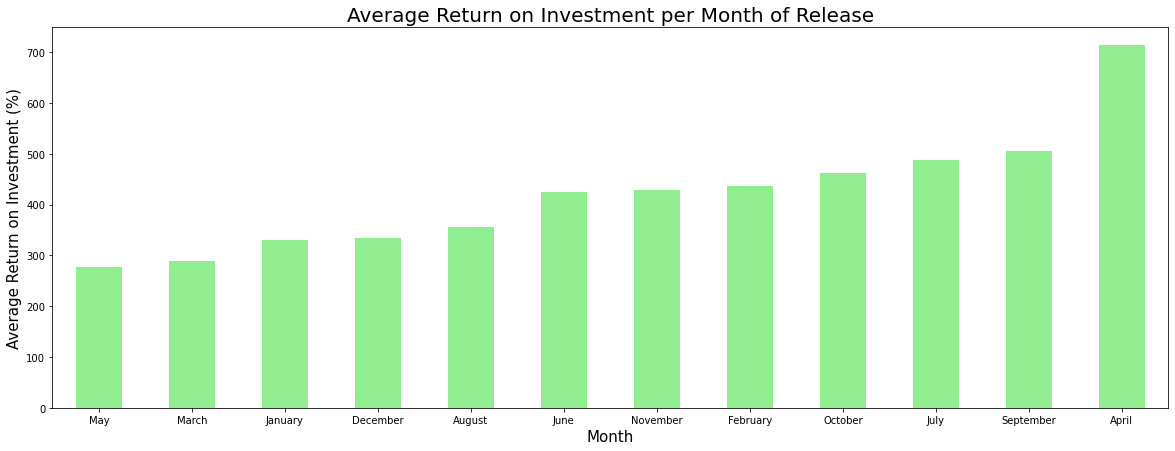

In [327]:
# Create a plot that shows average return on investment (RoI) by month
fig, ax = plt.subplots(figsize=(20,7))
release_time_df.groupby('release_month')['ROI'].mean().sort_values().plot(kind='bar', color='lightgreen')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Month of Release', fontsize=20);

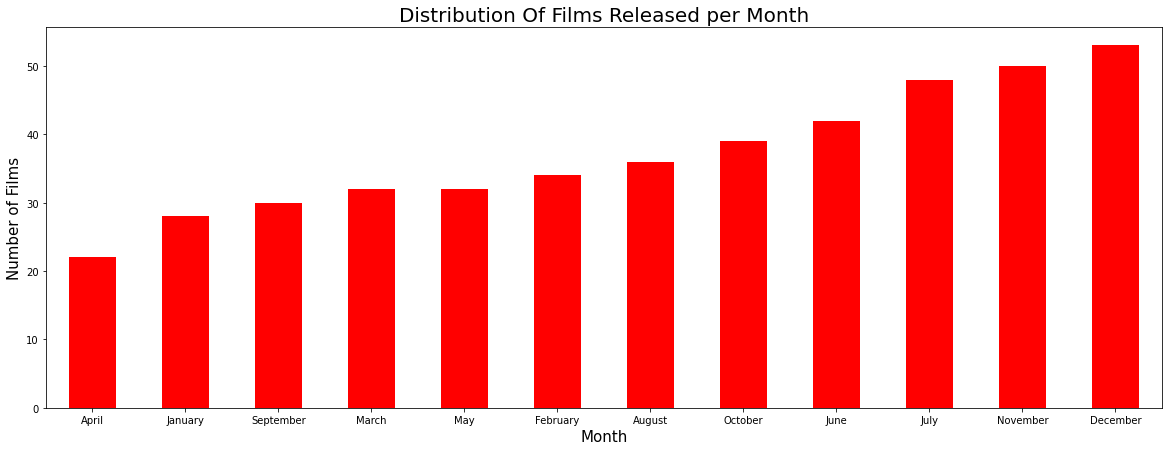

In [329]:
# Create a plot that shows the number of films released each month
fig, ax = plt.subplots(figsize=(20,7))
release_time_df.groupby('release_month')['original_title'].count().sort_values().plot(kind='bar', color='red')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films Released per Month', fontsize=20);

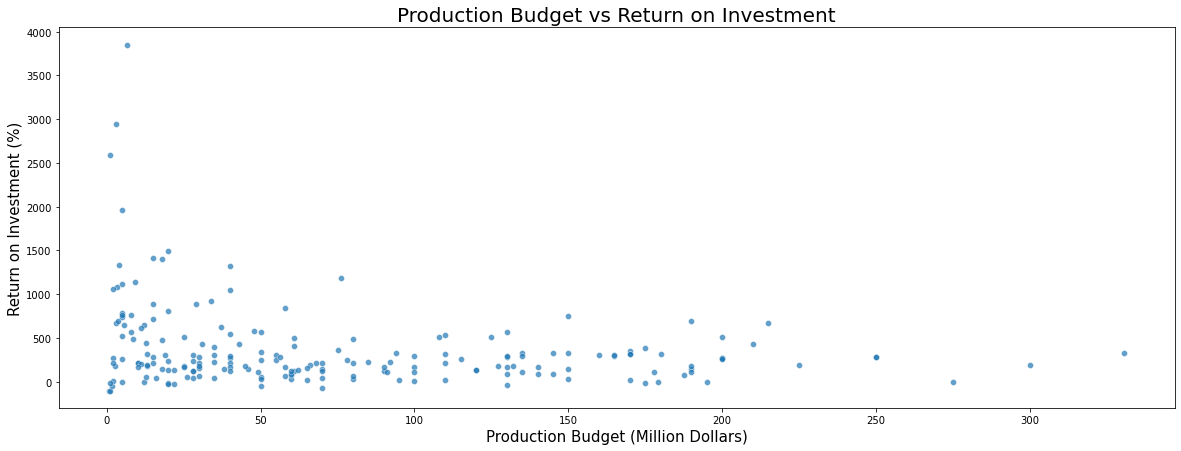

In [305]:
fig, ax = plt.subplots(figsize=(20,7))

# convert production_budget to million dollars
tmbd_mb_df['production_budget_million'] = tmbd_mb_df['production_budget'] / 1000000

sns.scatterplot(x='production_budget_million', y='ROI', data=tmbd_mb_df.head(200), palette='viridis', alpha=0.7)

ax.set_xlabel('Production Budget (Million Dollars)', fontsize=15)
ax.set_ylabel('Return on Investment (%)', fontsize=15)
ax.set_title('Production Budget vs Return on Investment', fontsize=20);


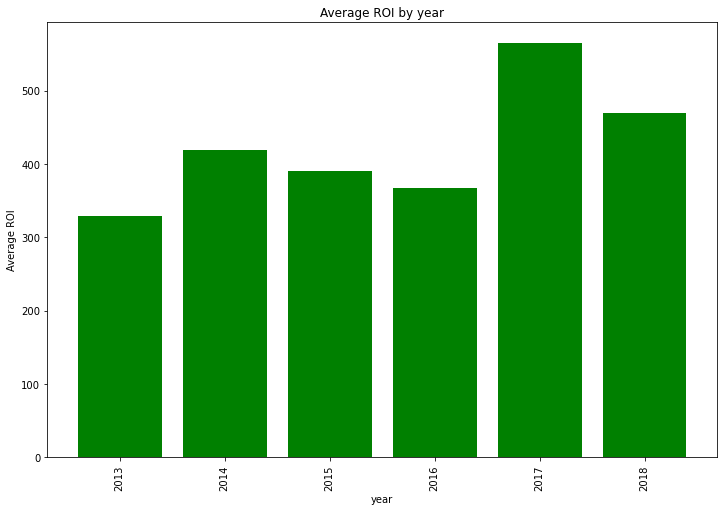

In [274]:

# Calculate average ROI by year
avg_roi_by_year = tmbd_mb_df.groupby('year')['ROI'].mean().reset_index()

# Sort by ROI in descending order
avg_roi_by_year = avg_roi_by_year.sort_values(by='ROI', ascending=False)

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x=avg_roi_by_year['year'], height=avg_roi_by_year['ROI'], color='green')

# Set chart title and axis labels
ax.set_title('Average ROI by year')
ax.set_xlabel('year')
ax.set_ylabel('Average ROI')

# Set x-tick rotation for better readability
plt.xticks(rotation=90)

# Show the chart
plt.show()


In [306]:
# creating a DF for genre popularity
genre_popl = pd.DataFrame(columns=['popularity', 'title', 'vote_average', 'genre', 'ROI'])

#iterate through each row of the original dataset and for each row, extract the list of genre ids
for i in range(len(tmbd_mb_df)):
    ids = tmbd_mb_df['genre_ids'][i]
    for j in range(len(ids)):
        popularity = tmbd_mb_df.iloc[i]['popularity']
        title = tmbd_mb_df.iloc[i]['original_title']
        avg = tmbd_mb_df.iloc[i]['vote_average']
        genre = int(ids[j])
        budget = tmbd_mb_df.iloc[i]['production_budget']
        revenue = tmbd_mb_df.iloc[i]['worldwide_gross']
        roi = ((revenue - budget) / budget)*100 if budget != 0 else 0
        values = [popularity, title, avg, genre, roi]
        zipped = zip(genre_popl.columns, values)
        to_append = dict(zipped)
        genre_popl = genre_popl.append(to_append, True)




In [309]:
genre_popl

,popularity,title,vote_average,genre,ROI
0,32.09,Iron Man 3,6.90,28,507.70
1,32.09,Iron Man 3,6.90,12,507.70
2,32.09,Iron Man 3,6.90,878,507.70
3,31.01,Thor: The Dark World,6.70,28,329.74
4,31.01,Thor: The Dark World,6.70,12,329.74
...,...,...,...,...,...
1239,13.18,12 Strong,5.60,28,103.20
1240,12.53,A Wrinkle in Time,5.00,12,29.52
1241,12.53,A Wrinkle in Time,5.00,878,29.52
1242,12.53,A Wrinkle in Time,5.00,10751,29.52


In [310]:
gernre_popl_merged = genre_popl.merge(genre_df, left_on="genre", right_on="id")
gernre_popl_merged

,popularity,title,vote_average,genre_x,ROI,id,genre_y
0,32.09,Iron Man 3,6.90,28,507.70,28,Action
1,31.01,Thor: The Dark World,6.70,28,329.74,28,Action
2,27.67,Man of Steel,6.50,28,196.89,28,Action
3,25.05,47 Ronin,6.00,28,-13.30,28,Action
4,21.38,R.I.P.D.,5.60,28,-39.17,28,Action
...,...,...,...,...,...,...,...
1239,11.73,Straight Outta Compton,7.70,10402,622.08,10402,Music
1240,10.81,We Are Your Friends,6.30,10402,407.67,10402,Music
1241,16.29,Trolls,6.60,10402,175.32,10402,Music
1242,14.89,Pitch Perfect 3,6.50,10402,312.75,10402,Music


In [312]:
# getting value counts for genre column
gernre_popl_merged['genre_y'].value_counts()

Drama              183
Action             164
Comedy             134
Adventure          132
Thriller           131
Science Fiction     90
Crime               67
Fantasy             66
Family              52
Horror              51
Romance             42
Animation           40
Mystery             39
History             27
War                 13
Music                8
Western              5
Name: genre_y, dtype: int64

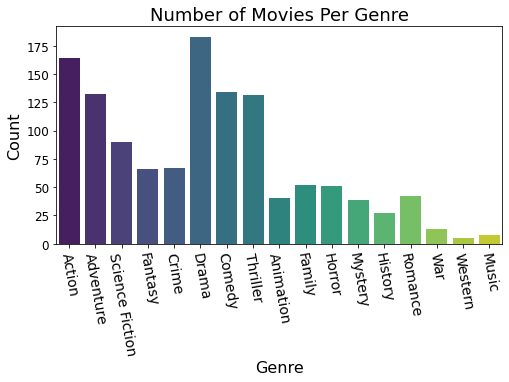

In [313]:
# plotting the number of movies per genre in dataset
plt.figure(figsize=(8,4))
sns.countplot(x='genre_y', data=gernre_popl_merged, palette='viridis')
plt.title('Number of Movies Per Genre', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);

In [291]:
#rank movies with highest mean vote_average
top_votes = genre_popl.groupby("genre").mean().sort_values(by="vote_average", ascending=False).reset_index()
top_votes

,genre,popularity,vote_average,ROI
0,10402,18.62,7.20,722.28
1,36,16.19,7.06,275.35
2,10752,21.46,7.04,339.15
3,18,16.26,6.93,336.94
4,37,16.77,6.80,146.02
5,10749,14.26,6.76,401.53
6,16,17.76,6.75,404.61
7,10751,17.75,6.70,353.96
8,12,22.96,6.60,267.76
9,80,16.78,6.58,216.30


In [293]:
#rank movies with highest mean popularity
top_popularity = genre_popl.groupby("genre").mean().sort_values(by="popularity", ascending=False).reset_index()
top_popularity

,genre,popularity,vote_average,ROI
0,12,22.96,6.60,267.76
1,28,22.65,6.51,263.44
2,14,22.61,6.47,225.87
3,878,22.52,6.57,329.80
4,10752,21.46,7.04,339.15
5,10402,18.62,7.20,722.28
6,53,18.18,6.47,562.02
7,16,17.76,6.75,404.61
8,10751,17.75,6.70,353.96
9,9648,16.95,6.58,671.17


In [299]:
most_popular = top_popularity.merge(genre_df, left_on="genre", right_on="id")
most_popular = most_popular.drop(['genre_x', 'id','vote_average'], axis=1)
most_popular

,popularity,ROI,genre_y
0,22.96,267.76,Adventure
1,22.65,263.44,Action
2,22.61,225.87,Fantasy
3,22.52,329.80,Science Fiction
4,21.46,339.15,War
5,18.62,722.28,Music
6,18.18,562.02,Thriller
7,17.76,404.61,Animation
8,17.75,353.96,Family
9,16.95,671.17,Mystery


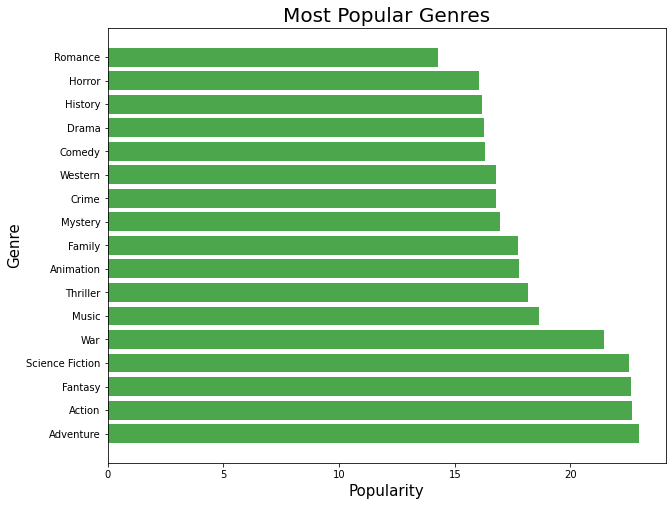

In [296]:

# Create the DataFrame
df = pd.DataFrame({'popularity': [22.96, 22.65, 22.61, 22.52, 21.46, 18.62, 18.18, 17.76, 17.75, 16.95, 16.78, 16.77, 16.30, 16.26, 16.19, 16.06, 14.26],
                   'genre_y': ['Adventure', 'Action', 'Fantasy', 'Science Fiction', 'War', 'Music', 'Thriller', 'Animation', 'Family', 'Mystery', 'Crime', 'Western', 'Comedy', 'Drama', 'History', 'Horror', 'Romance']})

# Sort the DataFrame by popularity
most_popular = df.sort_values(by='popularity', ascending=False)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y=most_popular['genre_y'], width=most_popular['popularity'], color='green', alpha=0.7)

# Set the x-tick labels
ax.set_xlabel('Popularity', fontsize=15)

# Set the y-tick labels
ax.set_ylabel('Genre', fontsize=15)

# Set the title
ax.set_title('Most Popular Genres', fontsize=20)

# Show the plot
plt.show()



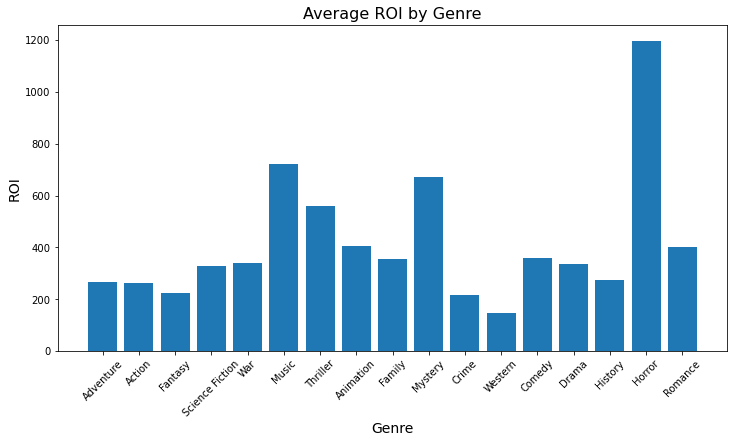

In [300]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots(figsize=(12,6))

# set the x-axis and y-axis labels
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('ROI', fontsize=14)

# create the bar chart
ax.bar(most_popular['genre_y'], most_popular['ROI'])

# rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# add a title to the graph
plt.title('Average ROI by Genre', fontsize=16)

# display the graph
plt.show()


In [295]:
highly_voted = top_votes.merge(genre_df, left_on="genre", right_on="id")
highly_voted = highly_voted.drop(['genre_x', 'id','popularity'], axis=1)
highly_voted

,vote_average,ROI,genre_y
0,7.20,722.28,Music
1,7.06,275.35,History
2,7.04,339.15,War
3,6.93,336.94,Drama
4,6.80,146.02,Western
5,6.76,401.53,Romance
6,6.75,404.61,Animation
7,6.70,353.96,Family
8,6.60,267.76,Adventure
9,6.58,216.30,Crime


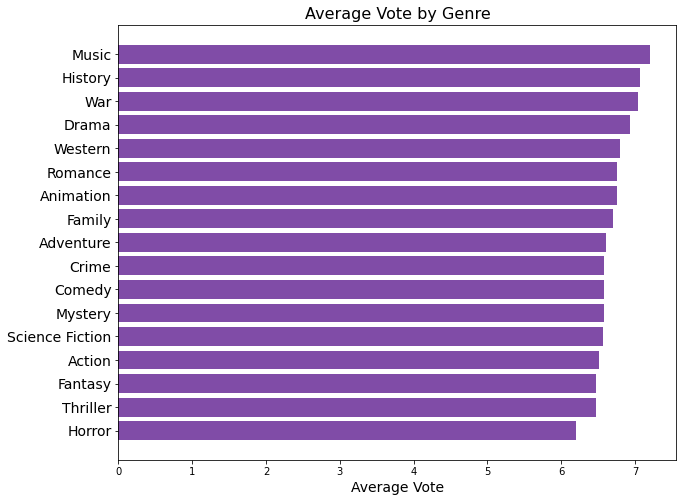

In [269]:
import pandas as pd
import matplotlib.pyplot as plt

# create the dataframe
data = {'vote_average': [7.20, 7.06, 7.04, 6.93, 6.80, 6.76, 6.75, 6.70, 6.60, 6.58, 6.58, 6.58, 6.57, 6.51, 6.47, 6.47, 6.20],
       'genre_y': ['Music', 'History', 'War', 'Drama', 'Western', 'Romance', 'Animation', 'Family', 'Adventure', 'Crime', 'Comedy', 'Mystery', 'Science Fiction', 'Action', 'Fantasy', 'Thriller', 'Horror']}
df = pd.DataFrame(data)

# sort the dataframe by vote_average in descending order
most_popular = df.sort_values(by='vote_average', ascending=False)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y=range(len(df)), width=most_popular['vote_average'], color='indigo', alpha=0.7)

# set the y-tick labels as the genres
ax.set_yticks(range(len(df)))
ax.set_yticklabels(most_popular['genre_y'], fontsize=14)

# set the x-axis label
ax.set_xlabel('Average Vote', fontsize=14)

# set the title
ax.set_title('Average Vote by Genre', fontsize=16)

# invert the y-axis to display the genres in descending order
ax.invert_yaxis()

# display the plot
plt.show()
